<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description


1.   This notebook is part1 of Auto voice cloning (AVC) project
2.   In this notebook we will use [this github repo](https://github.com/gkv856/end2end_auto_voice_conversion)
3.   First we will create mel-spectrogram from the raw audio
4.   Then we will train Embedding model using GE2E loss
5.   Then we will test the model

* [How to create embedding model using 'Generalized End-to-End Loss for Speaker Verification' 
(GE2E)](https://github.com/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb)
* [Paper used](https://arxiv.org/abs/1710.10467)


# Installing dependencies

In [1]:
pip install webrtcvad

     |████████████████████████████████| 66 kB 2.6 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72411 sha256=7bcb9f06e3e0e860c34ee151c33fa5fab024c806d41a390e5ff1b235d7cf5219
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


# Clone the git repository

In [2]:
!git clone https://github.com/gkv856/end2end_auto_voice_conversion.git

Cloning into 'end2end_auto_voice_conversion'...
remote: Enumerating objects: 849, done.
remote: Counting objects: 100% (849/849), done.
remote: Compressing objects: 100% (605/605), done.
remote: Total 849 (delta 330), reused 713 (delta 194), pack-reused 0
Receiving objects: 100% (849/849), 390.28 MiB | 28.54 MiB/s, done.
Resolving deltas: 100% (330/330), done.
Checking out files: 100% (214/214), done.


# ACTION REQUIRED:
**Rename the downloaded folder from "end2end_auto_voice_conversion" to "AVC"**

In [3]:
!mv end2end_auto_voice_conversion AVC


# Importing the hyper parameter

In [4]:
from AVC.strings.constants import hp

Device type available = 'cuda:0'


# Create mel-spectrogram from raw data

In [5]:
from AVC.s1_data_prep.audio_to_spectrogram import CreateSpectrogram
from AVC.s2_generalized_end2end_loss_GE2E.s4_train_embed_model import TrainEmbedModel

In [6]:
# # dataset1
# cr_obj = CreateSpectrogram(hp)
# cr_obj.save_spectrogram_tisv()

In [7]:
# # seconda dataset
# hp.raw_audio.raw_audio_path = "/content/AVC/static/raw_data/librispeech_test-other"
# # step 1 prepare the spectrogram from the raw audio file
# cr_obj = CreateSpectrogram(hp)
# cr_obj.save_spectrogram_tisv()

# Train the Embedding model using GE2E loss

In [8]:

# step2 of the Auto voice cloning is to: train the embedding model
# to get a user's embedding or 256 dim vector representing user's speaking style

hp.m_ge2e.training_epochs = 1000
hp.m_ge2e.checkpoint_interval = 300
hp.m_ge2e.min_test_loss = 4

hp.m_ge2e.training_N = 4
hp.m_ge2e.training_M = 16

hp.m_ge2e.test_N = 4
hp.m_ge2e.test_M = 16

hp.m_ge2e.lr = 0.05
# creating training object
train_emb_model_obj = TrainEmbedModel(hp)

# training the model
model, train_loss, test_loss = train_emb_model_obj.train_model(lr_reduce=300, 
                                                               epoch_print=100, 
                                                               dot_print=10)
print(2)

Epoch:[100/1000] .......... Train_Loss:11.3946	 Test_Loss:8.2221	00:00:29
Epoch:[200/1000] .......... Train_Loss:21.6354	 Test_Loss:0.8744	00:00:29
Epoch:[300/1000] .......... Train_Loss:1.4710	 Test_Loss:2.0106	00:00:29
Reducing learning rate from 0.05 to 0.025
Model saved as 'ckpt_epoch_300_L_1.4710.pth'
Epoch:[400/1000] .......... Train_Loss:0.0212	 Test_Loss:0.0454	00:00:29
Epoch:[500/1000] .......... Train_Loss:7.2706	 Test_Loss:0.0089	00:00:29
Epoch:[600/1000] .......... Train_Loss:0.0755	 Test_Loss:0.0072	00:00:29
Reducing learning rate from 0.025 to 0.0125
Model saved as 'ckpt_epoch_600_L_0.0755.pth'
Epoch:[700/1000] .......... Train_Loss:1.0408	 Test_Loss:0.0249	00:00:29
Epoch:[800/1000] .......... Train_Loss:0.4239	 Test_Loss:0.2272	00:00:29
Epoch:[900/1000] .......... Train_Loss:0.0180	 Test_Loss:0.0007	00:00:29
Reducing learning rate from 0.0125 to 0.00625
Model saved as 'ckpt_epoch_900_L_0.0180.pth'
Epoch:[1000/1000] .......... Train_Loss:0.6401	 Test_Loss:0.0131	00:00:29


# Load pre-trained weights and test the embedding model

In [9]:
from AVC.s2_generalized_end2end_loss_GE2E.s5_eval_model import calculate_ERR, plot_scatter
from AVC.s2_generalized_end2end_loss_GE2E.s2_model_GE2E_loss_speach_embed import  get_pre_trained_embedding_model

In [11]:
# loading a pre-trained model

hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/m_best_900_L_0.0007.pth"
model = get_pre_trained_embedding_model(hp)

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/m_best_900_L_0.0007.pth


In [ ]:
#calculating ERR
# calculate_ERR(model, hp, 4, 8)

In [12]:
def plot_scatter_with_diff_spr_nums(model):
  print("\n\nUsing '4' speakers")
  num_speakers = 4
  num_utter = 16
  # plotting speaker embeddings
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '6' speakers")
  num_speakers = 6
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '10' speakers")
  num_speakers = 10
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)
    



Using '4' speakers


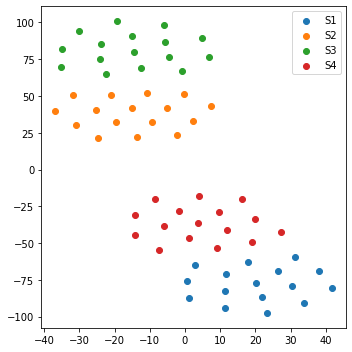

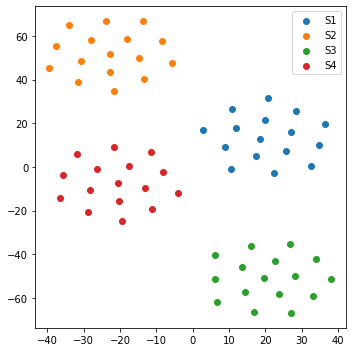

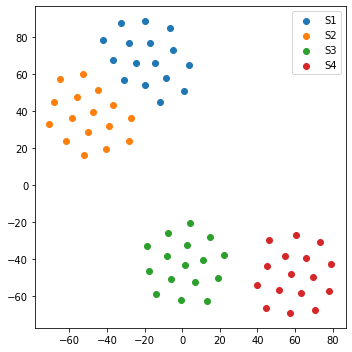



Using '6' speakers


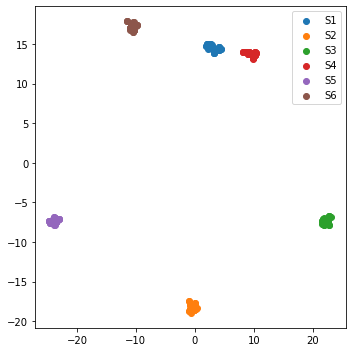

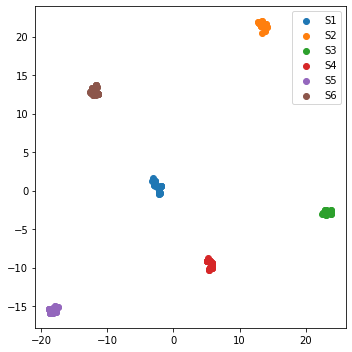



Using '10' speakers


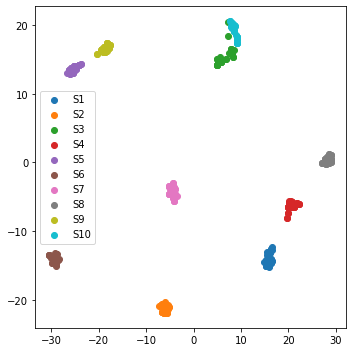

In [13]:
plot_scatter_with_diff_spr_nums(model)

# Embedding model test with Final Epoch weights

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.6401.pth


Using '4' speakers


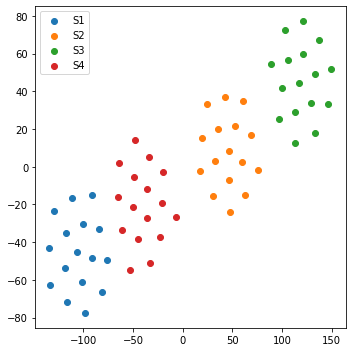

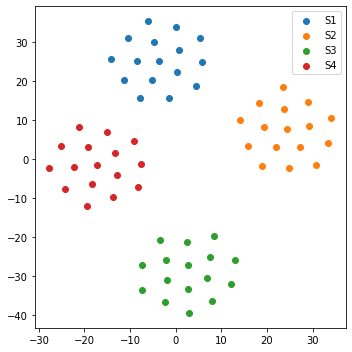

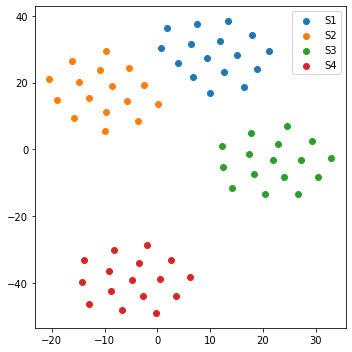



Using '6' speakers


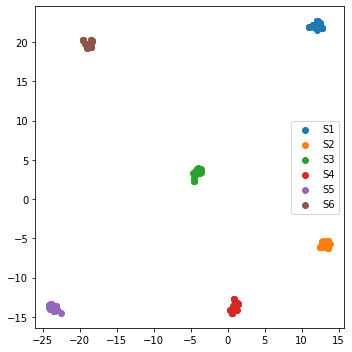

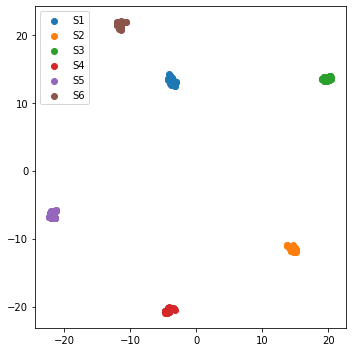



Using '10' speakers


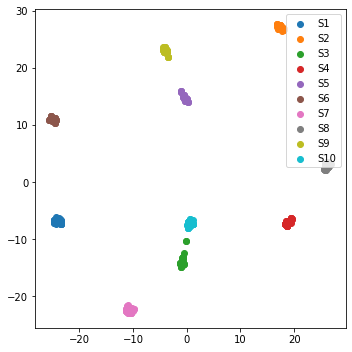

In [14]:
# loading a pre-trained model
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.6401.pth"
final_model = get_pre_trained_embedding_model(hp)
plot_scatter_with_diff_spr_nums(final_model)